In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

In [2]:
df = pd.read_csv("D:\\air_quality_dataset.csv")

In [3]:
df.head()

,City,Country,Date,PM2.5,PM10,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,Bangkok,Thailand,2023-03-19,86.57,25.19,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,Istanbul,Turkey,2023-02-16,50.63,97.39,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,Rio de Janeiro,Brazil,2023-11-13,130.21,57.22,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,Mumbai,India,2023-03-16,119.70,130.52,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,Paris,France,2023-04-04,55.20,36.62,76.85,21.85,2.00,67.09,16.02,90.28,14.16


In [63]:
df.isnull().sum()

City           0
Country        0
Date           0
PM2.5          0
PM10           0
NO2            0
SO2            0
CO             0
O3             0
Temperature    0
Humidity       0
Wind Speed     0
dtype: int64

In [186]:
x = df.drop(['City','Country','Date','PM2.5','PM10'],axis=1)
x

,NO2,SO2,CO,O3,Temperature,Humidity,Wind Speed
0,99.88,30.63,4.46,36.29,17.67,59.35,13.76
1,48.14,8.71,3.40,144.16,3.46,67.51,6.36
2,98.51,9.92,0.12,179.31,25.29,29.30,12.87
3,10.96,33.03,7.74,38.65,23.15,99.97,7.71
4,76.85,21.85,2.00,67.09,16.02,90.28,14.16
...,...,...,...,...,...,...,...
9995,90.33,34.93,2.81,191.45,-1.92,65.22,15.48
9996,49.04,5.66,2.10,184.56,-9.81,12.16,10.75
9997,8.41,32.58,0.69,167.68,39.35,53.95,4.56
9998,43.23,29.19,6.01,148.50,26.21,58.54,2.71


In [187]:
y = df['PM10']

In [188]:
from sklearn.preprocessing import RobustScaler

In [189]:
scl = RobustScaler(with_scaling=True)

In [190]:
x = scl.fit_transform(x)

In [215]:
from sklearn.preprocessing import PowerTransformer
trf = PowerTransformer()

In [216]:
x = trf.fit_transform(x)

In [217]:
x

array([[ 1.74749599,  0.37745294, -0.20778677, ...,  0.1973675 ,
         0.16163738,  0.62395463],
       [-0.14969412, -1.18171602, -0.57883628, ..., -0.79005533,
         0.47636702, -0.68952711],
       [ 1.69718178, -1.09532991, -1.72444012, ...,  0.72205307,
        -0.99214401,  0.46512306],
       ...,
       [-1.60117861,  0.5154695 , -1.52559161, ...,  1.68352781,
        -0.04629456, -1.00675479],
       [-0.3293053 ,  0.27546469,  0.33573395, ...,  0.78520788,
         0.13042888, -1.33209191],
       [-0.06406552, -0.29162611, -1.59537308, ..., -0.85714541,
         0.42001289, -0.92751451]])

In [218]:
from sklearn.model_selection import train_test_split 

In [219]:
x_train , x_test , y_train  , y_test = train_test_split(x,y,test_size=0.3)

C:\Users\patel\AppData\Local\Temp\ipykernel_2400\1479075778.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train)
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


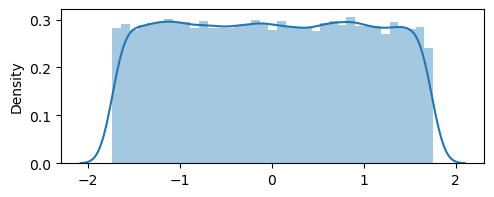

C:\Users\patel\AppData\Local\Temp\ipykernel_2400\1479075778.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train)
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

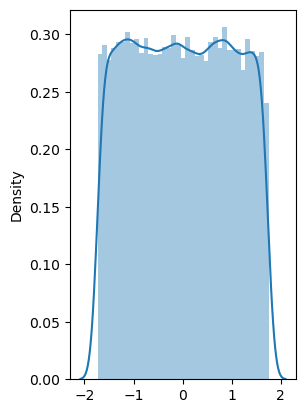

In [220]:
plt.figure(figsize=(12,2))
plt.subplot(121)
sns.distplot(x_train)
plt.show()

plt.subplot(122)
sns.distplot(x_train)

In [221]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error , r2_score

In [222]:
regr = xgb.XGBRegressor(tree_method = 'hist', eval_metric = mean_absolute_error)

In [227]:
regr.fit(x_train,y_train,eval_set=[(x_test,y_test)])

[0]	validation_0-rmse:54.81183	validation_0-mean_absolute_error:47.35957
[1]	validation_0-rmse:54.86670	validation_0-mean_absolute_error:47.36971
[2]	validation_0-rmse:54.89601	validation_0-mean_absolute_error:47.36280
[3]	validation_0-rmse:54.90140	validation_0-mean_absolute_error:47.37500
[4]	validation_0-rmse:54.96600	validation_0-mean_absolute_error:47.42033
[5]	validation_0-rmse:54.96870	validation_0-mean_absolute_error:47.41064
[6]	validation_0-rmse:55.12873	validation_0-mean_absolute_error:47.53737
[7]	validation_0-rmse:55.16786	validation_0-mean_absolute_error:47.55611
[8]	validation_0-rmse:55.25776	validation_0-mean_absolute_error:47.61691
[9]	validation_0-rmse:55.15744	validation_0-mean_absolute_error:47.54352
[10]	validation_0-rmse:55.20550	validation_0-mean_absolute_error:47.59036
[11]	validation_0-rmse:55.34778	validation_0-mean_absolute_error:47.69936
[12]	validation_0-rmse:55.37574	validation_0-mean_absolute_error:47.70582
[13]	validation_0-rmse:55.45940	validation_0-mea

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function mean_absolute_error at 0x000001A46E471BC0>,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [228]:
y_pred = regr.predict(x_test)

In [229]:
mean_absolute_error(y_test , y_pred)

49.38574445424081

In [230]:
r2_score(y_test , y_pred)

-0.1380813070641964